# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#URL instruction: https://openweathermap.org/appid#use

url = f'http://api.openweathermap.org/data/2.5/weather?'

In [4]:
record_num = 0
set_num = 1
city_info = []

for city in cities:
    query_url = url + 'appid=' + weather_api_key + '&q=' + city
    weather_json = requests.get(query_url).json()
    
    try:
        record_num += 1
        latitude = weather_json["coord"]["lat"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        city_info.append({"Name": city, "Latitude": latitude, "Temperature (F)": temperature, "Humidity (%)": humidity, 
                          "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    
    except KeyError: 
        cities.remove(city)
        record_num = 0
        set_num += 1
        print("City not found. Skipping...")
        pass


Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | umm lajj
Processing Record 3 of Set 1 | santa cruz
Processing Record 4 of Set 1 | sioux lookout
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | caledon
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | mgachi
Processing Record 10 of Set 1 | cotonou
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | watsa
City not found. Skipping...
Processing Record 1 of Set 2 | atuona
Processing Record 2 of Set 2 | lompoc
Processing Record 3 of Set 2 | teahupoo
Processing Record 4 of Set 2 | moose factory
Processing Record 5 of Set 2 | melville
Processing Record 6 of Set 2 | jamestown
Processing Record 7 of Set 2 | sault sainte marie
Processing Record 8 of Set 2 | tuktoyaktuk
Processing Record 9 of Set 2 

Processing Record 3 of Set 14 | half moon bay
Processing Record 4 of Set 14 | taloqan
Processing Record 5 of Set 14 | cockburn town
Processing Record 6 of Set 14 | sept-iles
Processing Record 7 of Set 14 | copiapo
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 16 | tigzirt
Processing Record 2 of Set 16 | salalah
Processing Record 3 of Set 16 | inhambane
Processing Record 4 of Set 16 | port blair
Processing Record 5 of Set 16 | port-gentil
City not found. Skipping...
Processing Record 1 of Set 17 | tuatapere
Processing Record 2 of Set 17 | ambulu
Processing Record 3 of Set 17 | hami
Processing Record 4 of Set 17 | biltine
Processing Record 5 of Set 17 | samarai
Processing Record 6 of Set 17 | kaitangata
Processing Record 7 of Set 17 | moroni
Processing Record 8 of Set 17 | talavera de la reina
Processing Record 9 of Set 17 | kudahuvadhoo
Processing Record 10 of Set 17 | pathein
Processing Record 11 of Set 17 | alice springs
Processing Record 12 of Set

Processing Record 10 of Set 33 | chegutu
Processing Record 11 of Set 33 | husavik
Processing Record 12 of Set 33 | sambava
Processing Record 13 of Set 33 | huanren
Processing Record 14 of Set 33 | sabaudia
Processing Record 15 of Set 33 | fort nelson
Processing Record 16 of Set 33 | rawson
Processing Record 17 of Set 33 | rudnichnyy
Processing Record 18 of Set 33 | te anau
Processing Record 19 of Set 33 | olavarria
Processing Record 20 of Set 33 | graham
Processing Record 21 of Set 33 | ronne
Processing Record 22 of Set 33 | kangaatsiaq
Processing Record 23 of Set 33 | buribay
Processing Record 24 of Set 33 | anori
Processing Record 25 of Set 33 | big rapids
City not found. Skipping...
Processing Record 1 of Set 34 | rajo khanani
Processing Record 2 of Set 34 | abu dhabi
Processing Record 3 of Set 34 | mehamn
Processing Record 4 of Set 34 | amapa
Processing Record 5 of Set 34 | viedma
Processing Record 6 of Set 34 | sungaipenuh
Processing Record 7 of Set 34 | bacolod
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(city_info)
weather_df.head()

,Name,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,ushuaia,-54.80,280.15,87,90,3.10
1,umm lajj,25.02,299.82,39,0,5.38
2,santa cruz,-17.80,294.15,83,4,3.60
3,sioux lookout,50.10,265.15,72,20,4.10
4,luderitz,-26.65,289.15,100,13,1.00


In [6]:
weather_df.count()

Name                519
Latitude            519
Temperature (F)     519
Humidity (%)        519
Cloudiness (%)      519
Wind Speed (mph)    519
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

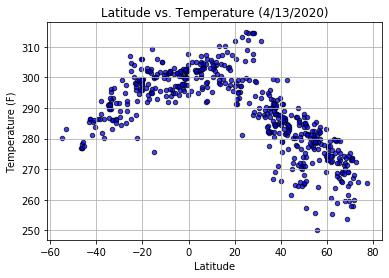

In [8]:
weather_df.plot.scatter(x = "Latitude", y = "Temperature (F)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Temperature (4/13/2020)")
plt.show()

#### Latitude vs. Humidity Plot

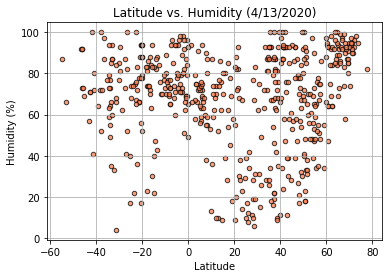

In [9]:
weather_df.plot.scatter(x = "Latitude", y = "Humidity (%)", color = "coral", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Humidity (4/13/2020)")
plt.show()

#### Latitude vs. Cloudiness Plot

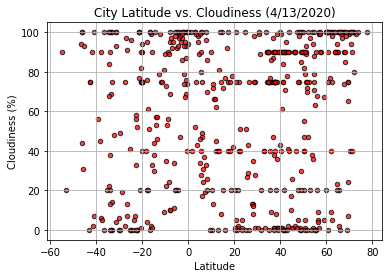

In [11]:
weather_df.plot.scatter(x = "Latitude", y = "Cloudiness (%)", color = "red", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (4/13/2020)")
plt.show()

#### Latitude vs. Wind Speed Plot

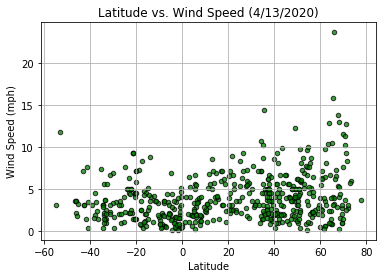

In [12]:
weather_df.plot.scatter(x = "Latitude", y = "Wind Speed (mph)", color = "green", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Wind Speed (4/13/2020)")
plt.show()